<center>

# Web Intelligence

# Who will win the Australian Open 2020 Tournament?

## 07 Revalidating The Prediction Models

### Riccardo Spolaor (864877)

</center>

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import python_files.ValidationOperations as valop


In [8]:
dataframe = pd.read_csv('./datasets/dataframe06.csv', low_memory = False)

In [9]:
dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,PlayedA,...,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,HandA,HandB,PlayedVsSameHandedA,PlayedVsSameHandedB,WonRatioVsSameHandedA,WonRatioVsSameHandedB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,1,0,0,0,0.0,0.0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,1,0,0,0.0,0.0,0,0


In [10]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'PlayedA', 'PlayedB', 'WonRatioA',
       'WonRatioB', 'RankA', 'RankFilledA', 'RankB', 'RankFilledB',
       'FadigueTournGamesA', 'FadigueTournGamesB', 'FadigueTournSetsA',
       'FadigueTournSetsB', 'PtsA', 'PtsFilledA', 'PtsB', 'PtsFilledB',
       'MaxA', 'MaxFilledA', 'MaxB', 'PlayedCourtA', 'PlayedCourtB',
       'WonRatioCourtA', 'WonRatioCourtB', 'MaxFilledB', 'AvgA',
       'AvgFilledA', 'AvgB', 'AvgFilledB', 'Carpet', 'Clay', 'Grass',
       'Hard', 'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R

# Features Relevance Analysis
Controllo dell'accuratezza delle predizioni di un albero dove viene applicato il tuning alla profondità per il dataset:
* Con tutte le feature;
* Eliminando le feature con le caratteristiche specifiche del giocatore A e il giocatore B e lasciando solo le feature di confronto tra le caratteristiche dei due giocatori (*caratteristicaA>caratteristicaB*).

Scelgo le feature del secondo caso in quanto l'accuratezza risulta essere maggiore. 

In [11]:
feat_supposed_not_relevant = ['WonRatioCourtA', 'WonRatioCourtB', 'WonRatioA', 'WonRatioB', 'OpponentsPlayed', 
                              'OpponentsWRatioA','OpponentsWRatioB', 'HandB', 'HandA', 'RankA', 'RankB',  'PtsA',
                              'PtsB', 'MaxA', 'MaxB', 'AvgA', 'AvgB',  'PlayedA', 'PlayedB','PlayedCourtA', 
                              'PlayedCourtB', 'FadigueTournGamesA','FadigueTournGamesB', 'FadigueTournSetsA', 
                              'FadigueTournSetsB', 'PlayedVsSameHandedA', 'PlayedVsSameHandedB','WonRatioVsSameHandedA',
                              'WonRatioVsSameHandedB', '5_gamesMeanA', '5_gamesMeanB', '5_setsMeanA', '5_setsMeanB']

In [12]:
def test_relevant_attributes(dataframe, dropped = False):

    x_train, x_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)
    
    accuracies = []

    for max_depth in range(2, 20):
        dt = DecisionTreeClassifier(max_depth=max_depth)

        dt.fit(x_train, y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(x_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(x_valid))

        accuracies += [[valid_acc, train_acc, max_depth]]

    fig, ax = plt.subplots(figsize=(15, 10))
    fig.suptitle('Accuracy on all features' if dropped==False else 'Accuracy on subset of features supposed to e more relevant')
    valop.plot_estimator_accuracy(ax, accuracies, 'Depth')

    best_accuracy, _, best_depth = max(accuracies)
    print("Best Depth:", best_depth, '- Accuracy:', best_accuracy)

Best Depth: 5 - Accuracy: 0.6922762804806907
Wall time: 39.8 s


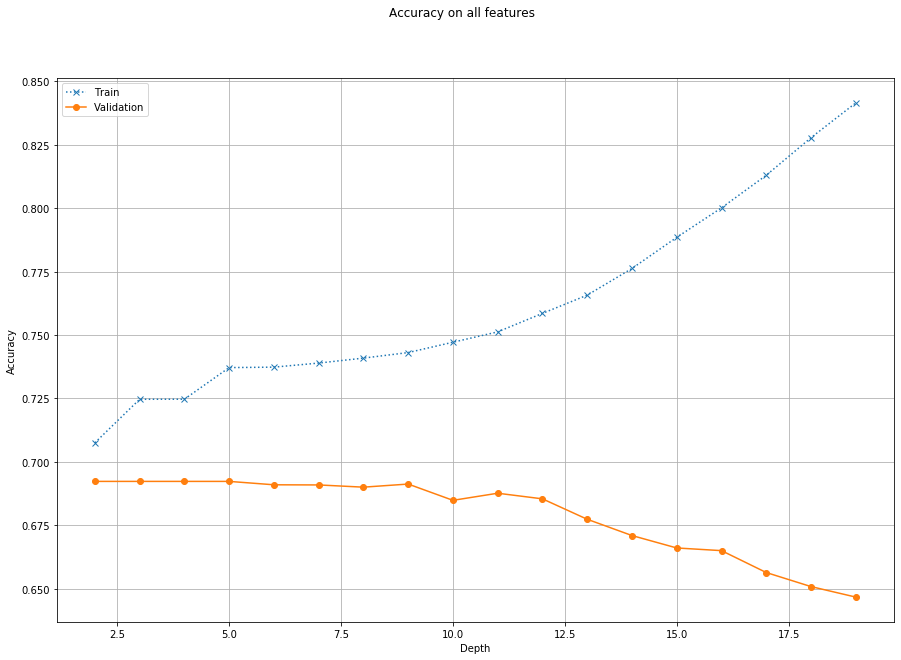

In [13]:
%%time
test_relevant_attributes(dataframe)

Best Depth: 3 - Accuracy: 0.6944347217360868
Wall time: 14.5 s


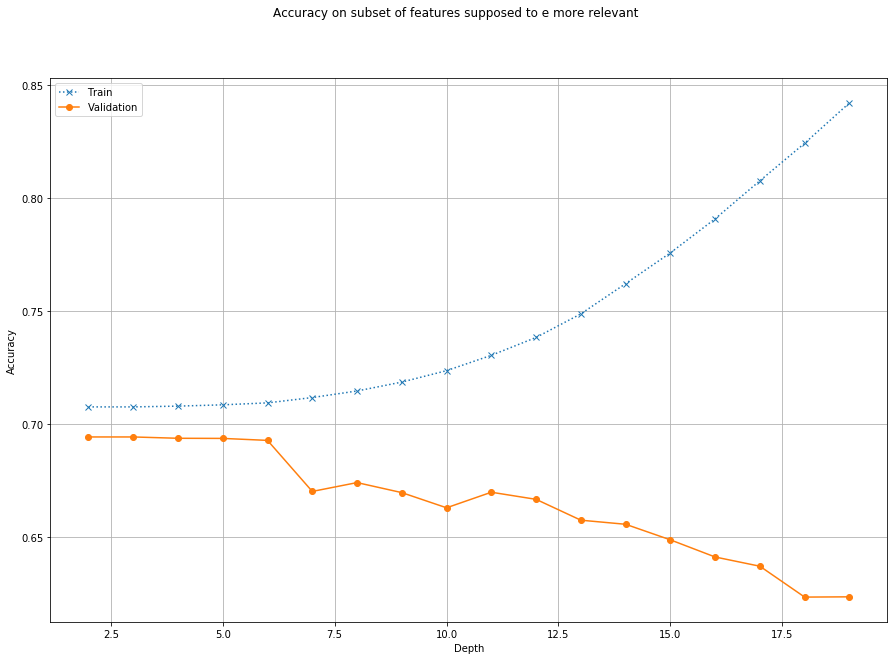

In [14]:
%%time
test_relevant_attributes(dataframe.drop(feat_supposed_not_relevant, axis = 1), True)

In [15]:
dataframe.drop(['WonRatioCourtA', 'WonRatioCourtB', 'WonRatioA', 'WonRatioB',
                'OpponentsPlayed', 'OpponentsWRatioA',
                'OpponentsWRatioB', 'HandA', 'HandB', 'HandA',
                'RankA', 'RankB',  'PtsA', 'PtsB', 'MaxA', 'MaxB', 'AvgA', 'AvgB',  'PlayedA', 'PlayedB',
                'PlayedCourtA', 'PlayedCourtB', 'FadigueTournGamesA','FadigueTournGamesB',
                'FadigueTournSetsA', 'FadigueTournSetsB', 
                'PlayedVsSameHandedA', 'PlayedVsSameHandedB','WonRatioVsSameHandedA','WonRatioVsSameHandedB',
                '5_gamesMeanA', '5_gamesMeanB', '5_setsMeanA', '5_setsMeanB',
               ], axis = 1, inplace = True)

# Validation
Seleziono l'anno da cui l'accuratezza per le predizioni di un albero classificatore con il tuning sulla profondità risulta essere maggiore in basandomi sulla feature ***CsvID*** ed utilizzo il dataset da quell'anno in poi.

Best Max csvID: 0 - Accuracy: 0.6944347217360868
Wall time: 2min 25s


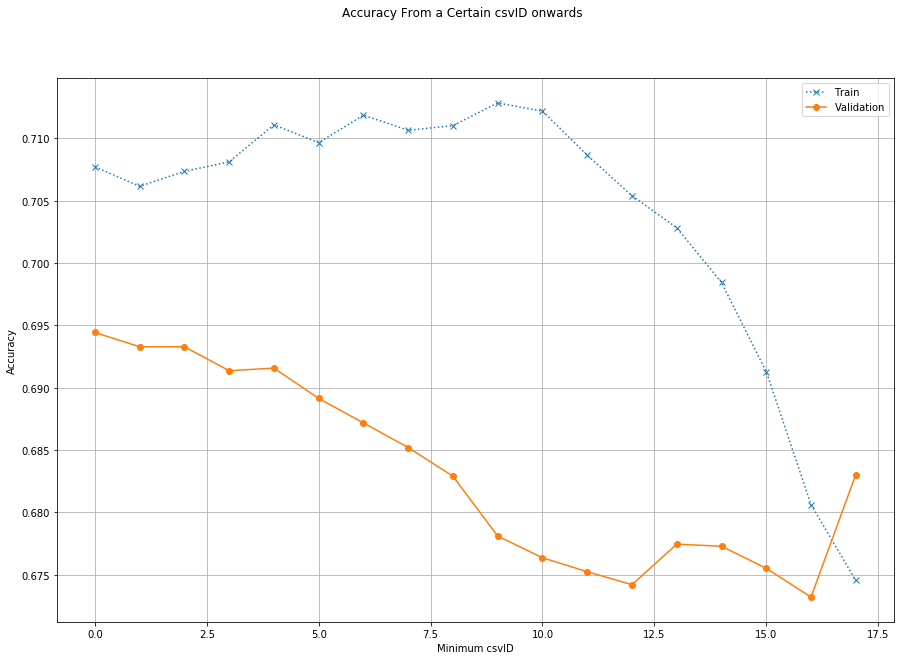

In [16]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [17]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,RetiredLastA,RetiredLastB,PlayedA>PlayedB,WonRatioA>WonRatioB,PlayedCourtA>PlayedCourtB,WonRatioCourtA>WonRatioCourtB,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree

Eseguo il tuning di un albero classificatore su ***max_depth***; ***max_features***.

Costruisco poi il grafico dell’analisi della decomposizione della varianza e distorsione quadratica delle previsioni del modello basata sulla profondità dell’albero.

All’aumentare della profondità diminuisce la distorsione, ma aumenta la varianza.

Best Max Depth: 3 - Accuracy: 0.6944347217360868
Best Max Features: 90 - Accuracy: 0.6944347217360868
Wall time: 40.5 s


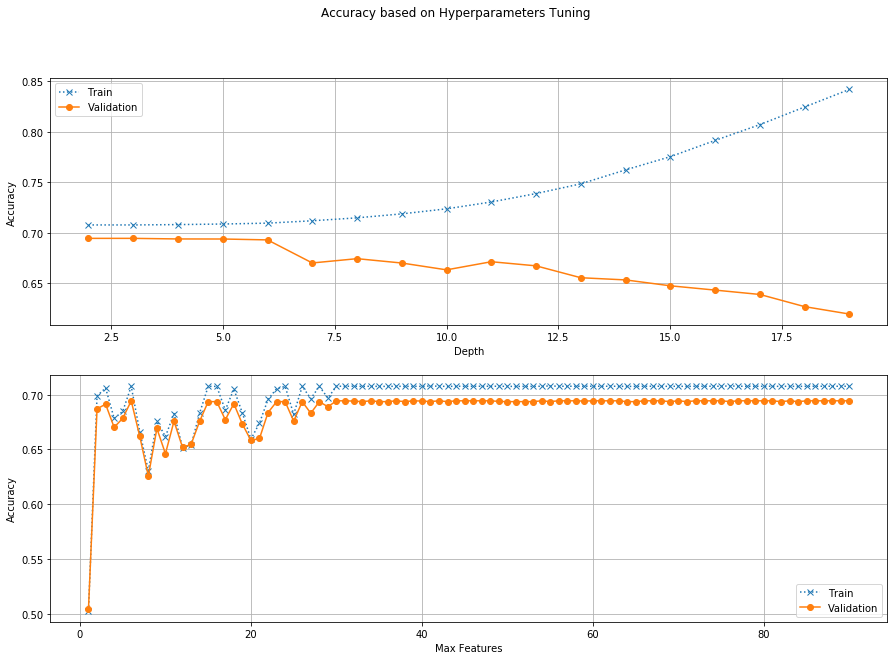

In [18]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 48.1 s


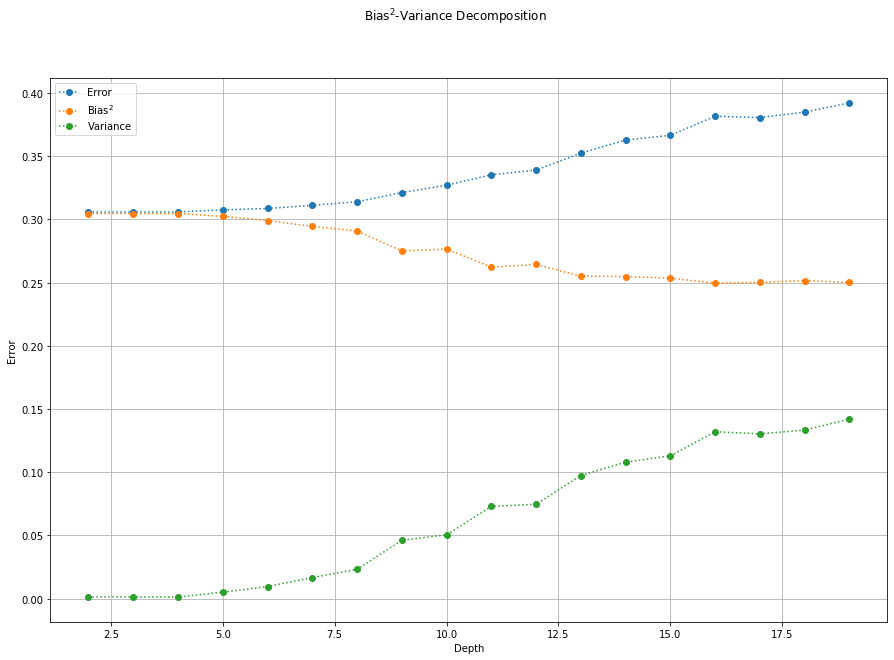

In [19]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.get_tree_variance_bias_decomposition(dataframe)

## AdaBoost

Eseguo il tuning di un AdaBoost Classifier su ***n_estimators***.

Costruisco poi il grafico dell’analisi della decomposizione della varianza e distorsione quadratica delle previsioni del modello basata sul numero di stimatori.

All’aumentare del numero degli stimatori la distorsione si abbassa di poco e la varianza aumenta peggiorando l'errore totale.

Un modello basato su AdaBoost con 2 stimatori predice alla pari di un albero con applicato il tuning degli iperparametri.

Best Number of Estimators: 2 - Accuracy: 0.6944347217360868
Wall time: 36.1 s


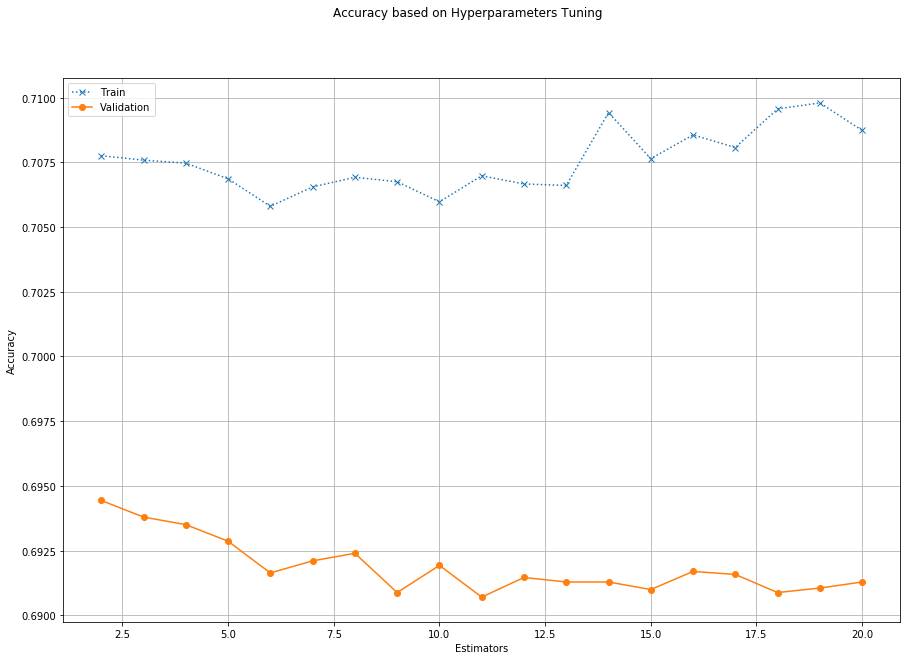

In [20]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 56.4 s


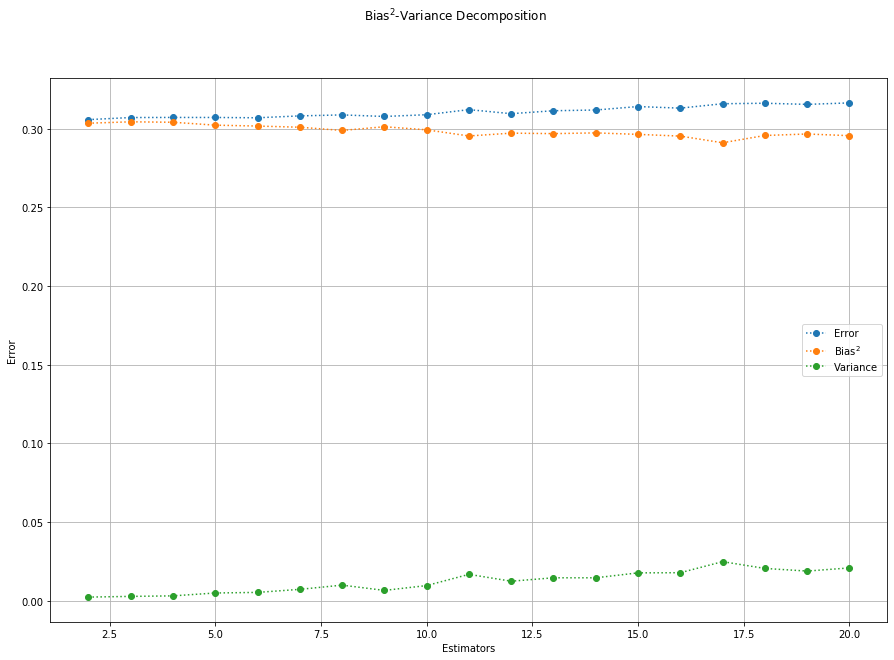

In [21]:
%%time
valop.get_boosted_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

## Random Forest
Eseguo il tuning di una random forest su ***n_estimators***; ***max_depth***.

Costruisco poi il grafico dell’analisi della decomposizione della varianza e distorsione quadratica delle previsioni del modello basata sul numero di stimatori.

All’aumentare degli stimatori la varianza si abbassa di poco e la distorsione rimane costante. 
La foresta predice peggio di un albero col tuning dei parametri applicato, in quanto riesce a mantenere bassa la distorsione, ma non riesce ad abbassare di molto la varianza, aumentando l'errore totale.

Costruisco infine il grafico dell’analisi della decomposizione della varianza e distorsione quadratica delle previsioni del modello con il tuning degli stimatori applicato basandomi sulla profondità.

All’aumentare della profondità la varianza aumenta e la distorsione si abbassa.

La foresta ottenuta predice risultati con variazioni di accuratezza minimali negative rispetto ad un albero con il tuning degli iperparametri applicato. 

Posso considerare la loro accuratezza pari.

Best Estimators Number 225 - Accuracy: 0.6629914829074787
Best Depth 8 - Accuracy: 0.6942597129856493
Wall time: 2min 31s


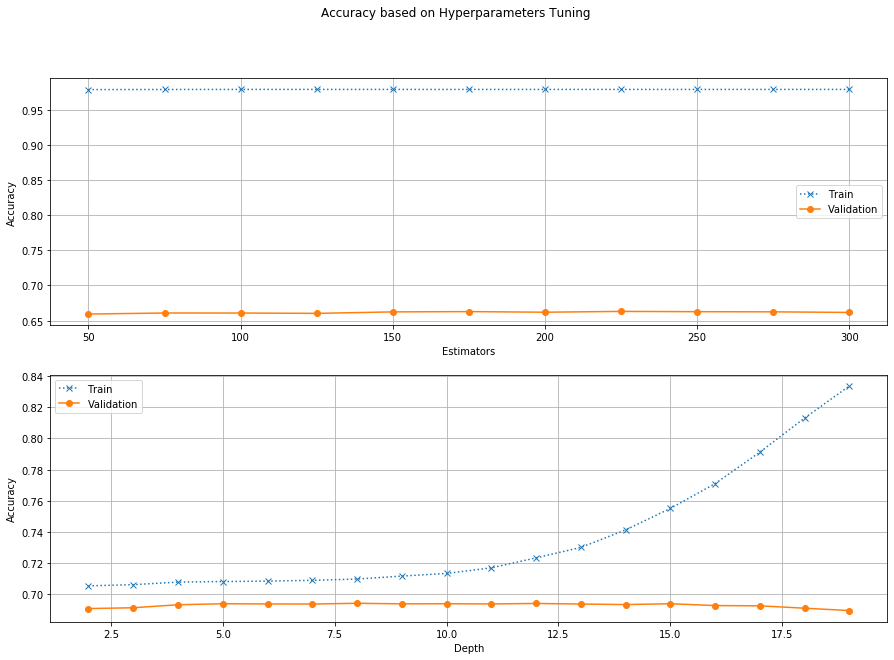

In [22]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)


Wall time: 2min 11s


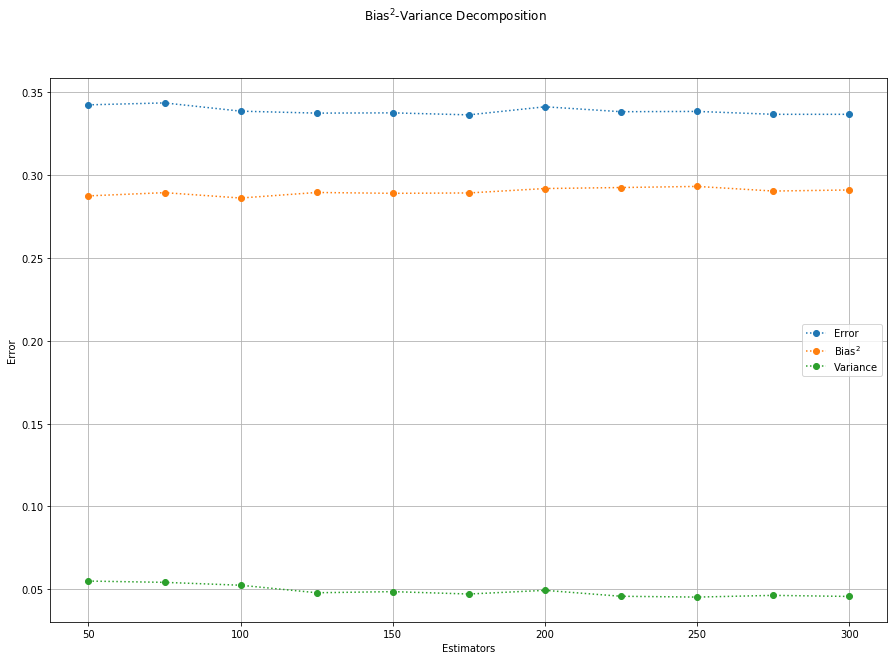

In [23]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe)

Wall time: 2min 18s


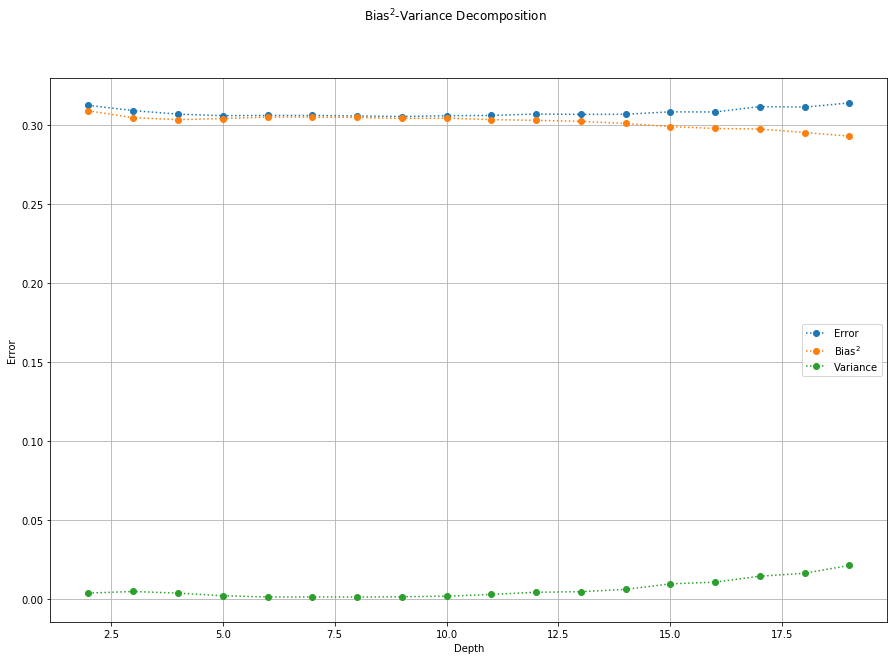

In [24]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe, forest_best_features['n_estimators'])

## Feature Importances e Recursive Feature Elimination
Controllo quali siano le feature considerate più importanti per la predizione della foresta ottenuta al passo precedente.
Seleziono tramite il **Recursive Feature Elimination** la metà delel feature considerate più importanti.

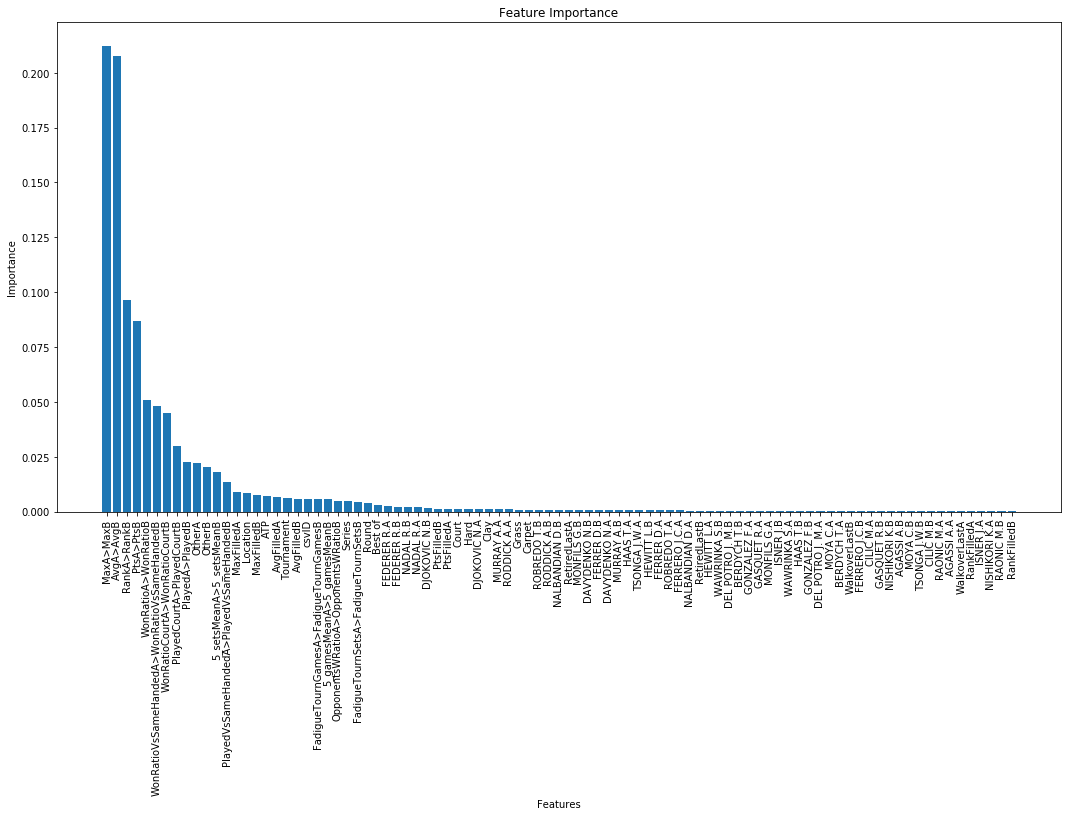

Wall time: 7.57 s


In [25]:
%%time

def get_best_features():
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)

    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    rf.fit(x,y)

    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = [x.columns[i] for i in indices]

    plt.figure(figsize=(18,9))
    plt.title("Feature Importance")
    plt.bar(range(x.shape[1]), importances[indices])
    plt.xticks(range(x.shape[1]), features, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
get_best_features()

In [26]:
%%time
def get_best_features_RFE():
    
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    
    selector = RFE(rf, step=1, n_features_to_select=None)

    selector.fit(x,y)

    features = x.columns.values[selector.support_]

    features = np.append(features,['Winner'])

    print('Selected features by RFE:')
    print(features)
    return features

features = get_best_features_RFE()

Selected features by RFE:
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Carpet' 'Clay' 'Grass' 'Hard' 'FEDERER R.A' 'FEDERER R.B'
 'NADAL R.A' 'NADAL R.B' 'DJOKOVIC N.B' 'MURRAY A.A' 'NALBANDIAN D.B'
 'DAVYDENKO N.A' 'DAVYDENKO N.B' 'OtherA' 'OtherB' 'RankA>RankB'
 'MaxA>MaxB' 'AvgA>AvgB' 'PtsA>PtsB' 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'RetiredLastA' 'PlayedA>PlayedB'
 'WonRatioA>WonRatioB' 'PlayedCourtA>PlayedCourtB'
 'WonRatioCourtA>WonRatioCourtB' '5_gamesMeanA>5_gamesMeanB'
 '5_setsMeanA>5_setsMeanB' 'PlayedVsSameHandedA>PlayedVsSameHandedB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']
Wall time: 5min 55s


### Random Forest considerando le Feature ottenute
Eseguo il tuning di una random forest su ***n_estimators***; ***max_depth*** considerando solamente le feature ottenute dal **RFE**.

La foresta ottenuta predice risultati con un accuratezza leggermente inferiore rispetto ad i modelli ottenuti ai passi precedenti, ma la quantità limitata di variabili garantisce una complessità computazionale più bassa. 

Utilizzo il modello otteuto per la predizione.

Best Estimators Number 275 - Accuracy: 0.6602496791506242
Best Depth 5 - Accuracy: 0.6938513592346284
Wall time: 3min 52s


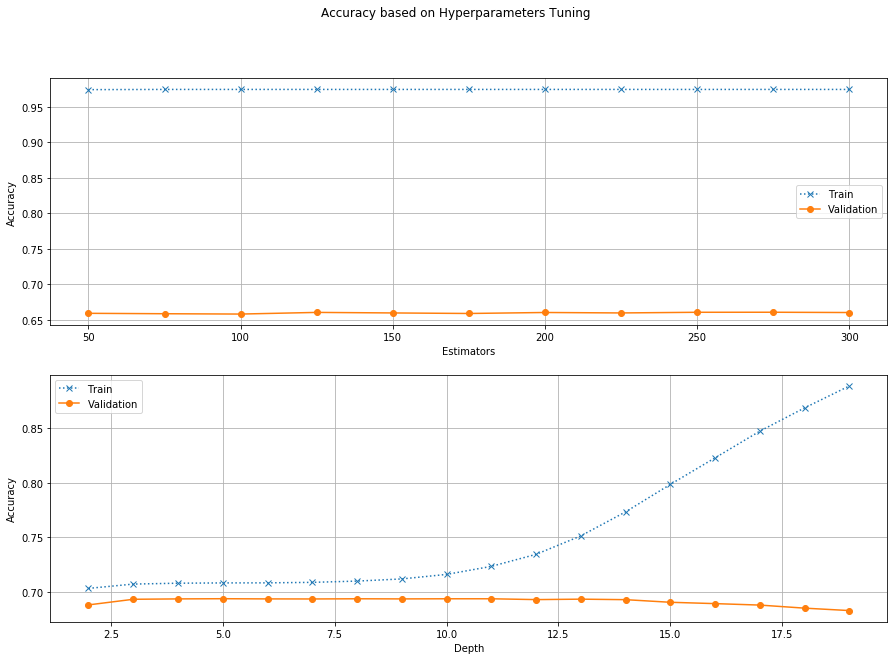

In [28]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

## Inspection of Prediction Results
Provo a misurare l'accuracy delle predizioni per le partite tra i giocatori più forti e per le partite tra i giocatori meno importanti, dal risultato è visibile come il modello predica più correttamente le partite giocate tra giocatori più forti ed abbia più difficoltà a predirre correttamente le partite giocate tra i giocatori più deboli.

Migliora ulteriormente l'accuracy per le partite dove almeno uno dei due giocatori è uno dei più importanti, questo probabilmente perché risulta più semplice prevedere il risultato della partita tra un giocatore forte e uno debole. 

In [35]:
dataframe = dataframe[features]

In [36]:
def get_prediction_accuracy_on_best_players_matches(most_important = True, condition = 'or'):
    
    if most_important:
        binary_value = 1
    else:
        binary_value = 0
    
    x_train, x_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                          dataframe['Winner'], test_size=0.33, shuffle=False,
                                                          stratify=None)
    x_valid = x_valid.reset_index(drop = True)
    y_valid = y_valid.reset_index(drop = True)
    
    indexes_to_drop = []
    for v in x_valid.itertuples():
        if condition == 'or':
            if v.OtherA == binary_value or v.OtherB == binary_value:
                indexes_to_drop.append(v.Index)
        else:
            if v.OtherA == 1 and v.OtherB == 1:
                indexes_to_drop.append(v.Index)
            
    x_valid.drop(x_valid.index[indexes_to_drop], axis = 0, inplace = True)
    y_valid.drop(y_valid.index[indexes_to_drop], axis = 0, inplace = True)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], 
                                max_depth = forest_best_features['max_depth'])

    rf.fit(x_train,y_train)
    
    score = accuracy_score(y_true=y_valid, y_pred=rf.predict(x_valid))
    
    if condition == 'or':
        if most_important:
            print('Accuracy on matches played by the most important players:', 
                  score)
        else:
            print('Accuracy on matches played by the least important players:', 
                  score)
    else:
        print('Accuracy on matches played by at least one important player:', 
                  score)
        
    return score

Accuracy on matches played by the most important players: 0.7263888888888889
Accuracy on matches played by the least important players: 0.6627697841726619
Accuracy on matches played by at least one important player: 0.7712830957230142


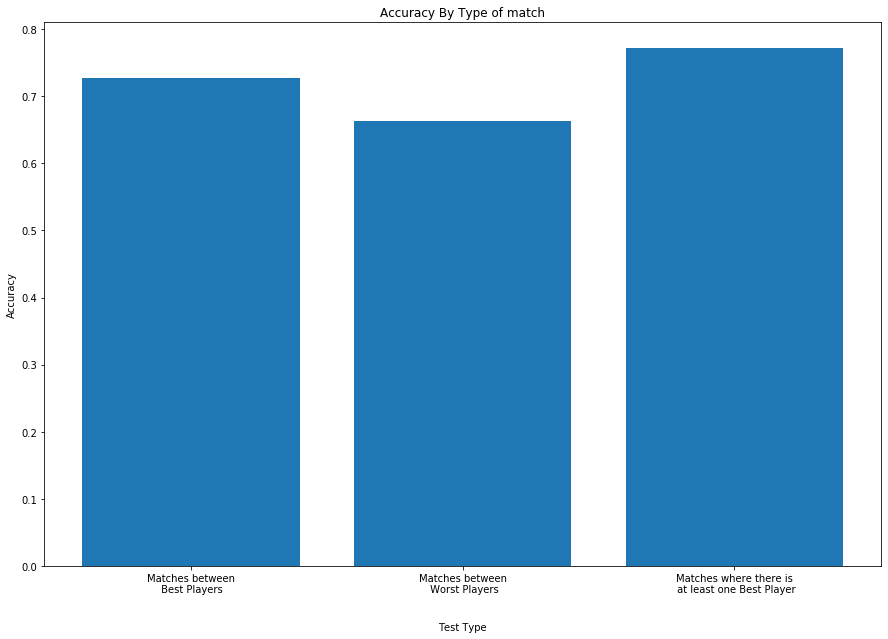

In [37]:
acc_best = get_prediction_accuracy_on_best_players_matches()
acc_worst = get_prediction_accuracy_on_best_players_matches(False)
acc_at_least_one_best = get_prediction_accuracy_on_best_players_matches(condition = 'and')

plt.figure(figsize=(15,10))
plt.title("Accuracy By Type of match")
plt.bar(range(3), [acc_best, acc_worst, acc_at_least_one_best])
plt.xticks(range(3), ['Matches between\n Best Players',
                     'Matches between\n Worst Players',
                     'Matches where there is\n at least one Best Player'])
plt.xlabel('\n\nTest Type')
plt.ylabel('Accuracy')
plt.show()

In [38]:
dataframe.to_csv('./datasets/dataframe_pred.csv', index = False)

In [32]:
%store forest_best_features

Stored 'forest_best_features' (dict)
